In [241]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [242]:
#[−1,2]×[−0.5,0.5]
N = 51
x_start, x_end = -1, 2
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end,N)
y = numpy.linspace(y_start, y_end,N)
X, Y = numpy.meshgrid(x,y)

In [243]:
x_airfoil=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_x.txt')
y_airfoil=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_y.txt')

sigma_airfoil=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')

In [244]:
u_inf = 1.0
a = 0*numpy.pi

u_freestream = u_inf*math.cos(a)*numpy.ones((N,N),dtype = float)
v_freestream = u_inf*math.sin(a)*numpy.ones((N,N),dtype = float)

psi_freestream = u_inf*(Y*math.cos(a)-X*math.sin(a))

In [245]:
def get_velocity(strength, xs, ys, X, Y):

    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [246]:
def get_stream_function(strength, xs, ys, X, Y):

    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
#numpy.arctan2((Y-ys)*math.cos(a), X*math.sin(a))
    
    return psi

In [247]:
strength_source = 5
u_source_sum,v_source_sum,psi_source_sum = 0,0,0

for i in range(0,len(x_airfoil)):
    u_source, v_source = get_velocity(strength_source, x_airfoil[i], y_airfoil[i], X, Y)
    psi_source = get_stream_function(strength_source, x_airfoil[i], y_airfoil[i], X, Y)
    u_source_sum = u_source_sum + u_source
    v_source_sum = v_source_sum + v_source
    psi_source_sum = psi_source_sum + psi_source

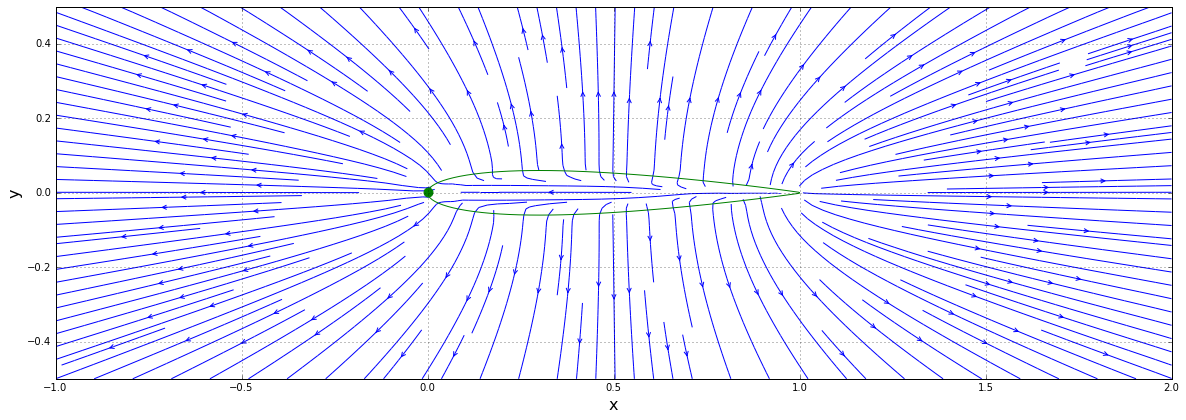

In [248]:
u = u_freestream + u_source_sum
v = v_freestream + v_source_sum
psi = psi_freestream + psi_source_sum


size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

#x_stagnation = x_source - math.cos(a)*strength_source/(2*numpy.pi*u_inf)
#y_stagnation = y_source - math.sin(a)*strength_source/(2*numpy.pi*u_inf)


pyplot.scatter(x_airfoil1[49], y_airfoil1[49], color='g', s=80, marker='o')


#pyplot.contour(X, Y, psi, levels=[-strength_source/2, +strength_source/2], colors='#CD2305', linewidths=2, linestyles='solid');
pyplot.plot(x_airfoil,y_airfoil)

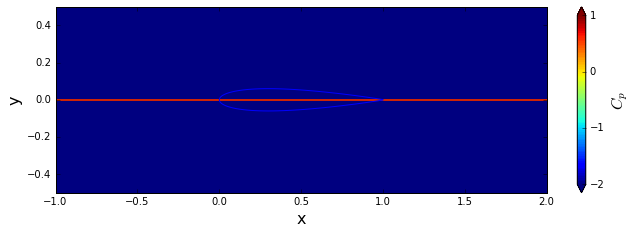

In [249]:
cp = 1.0 - (u**2+v**2)/u_inf**2

size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot(x_airfoil,y_airfoil)